<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2021/blob/main/ColabNotebooks/Lab2_Control2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stability of an autonomous linear system

Autonomous linear system is *stable*, iff the eigenvalues of its matrix have negative real parts. In other words, their should lie on the left half of the complex plane.

Consider the system:

$$\dot x = 
\begin{pmatrix} -1 & 0.4 \\ -20 & -16
\end{pmatrix}
x
$$

Let us find its eigenvalues:


In [1]:
import numpy as np
from numpy.linalg import eig

A = np.array([[-1, 0.4], [-20, -16]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [ -1.55377801 -15.44622199]


The eigenvalues are $\lambda_1 = -1.55$ and $\lambda_1 = -15.44$, both real and negative. Let us test those and show that the system's state converges:

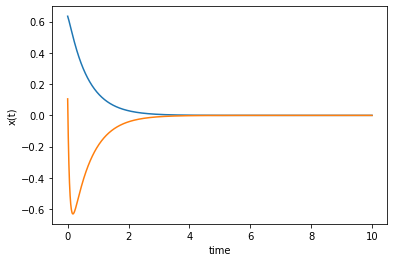

In [3]:

from scipy.integrate import odeint
import matplotlib.pyplot as plt

def LTV(x, t):
    return A.dot(x)

time = np.linspace(0, 10, 1000)    # interval from 0 to 10
x0 = np.random.rand(2)            # initial state

solution = odeint(LTV, x0, time)

plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

# Task 1. Find if the following autonomous linear systems are stable

$$\dot x = 
\begin{pmatrix} 1 & 0 \\ -5 & -10
\end{pmatrix}
x
$$
$$\dot x = 
\begin{pmatrix} 0 & 8 \\ 1 & 3
\end{pmatrix}
x
$$
$$\dot x = 
\begin{pmatrix} 0 & 8 \\ 6 & 0
\end{pmatrix}
x
$$
$$\dot x = 
\begin{pmatrix} 0 & 1 \\ 6 & 3
\end{pmatrix}
x
$$

# Task 1.1 Simulate all of them, to show convergence.
# Task 1.2 Add a constant term to the equation and show via simulation how the point where the system converges changes.

# Linear system with one control input

## Step 1

Consider the following to a second order ODE:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
$$

The eigenvalues are $\lambda_1 = -10$ and $\lambda_1 = 1$, so unstable. 

## Step 2

Now let's consider the same system, but with control input:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
1 \\ 0
\end{pmatrix}
u
$$

Let us chose that $u = -2x_1$, in other words:

$$
u = 
\begin{pmatrix} 
-2 & 0
\end{pmatrix}
x
$$

Then we can re-write this as:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
1 \\ 0
\end{pmatrix}
\begin{pmatrix} 
-2 & 0
\end{pmatrix}
x
$$

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
-2 & 0 \\ 0 & 0
\end{pmatrix}
x
$$


$$
\dot x = 
\begin{pmatrix} 
-1 & 0 \\ -5 & -10
\end{pmatrix}
x
$$

Now the eigenvalues are $\lambda_1 = -10$ and $\lambda_1 = -1$, so stable. 

In [9]:
A = np.array([[1, 0], [-5, -10]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

A = np.array([[-1, 0], [-5, -10]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [-10.   1.]
eigenvalues of A: [-10.  -1.]


# Task 2.1 Make the following systems, proposing appropriate control

$$\dot x = 
\begin{pmatrix} 10 & 0 \\ -5 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
2 \\ 0
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 0 & -8 \\ 1 & 30
\end{pmatrix}
x
+
\begin{pmatrix} 
-2 \\ 1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 2 & 2 \\ -6 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
0 \\ 5
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 5 & -5 \\ 6 & 15
\end{pmatrix}
x
+
\begin{pmatrix} 
-10 \\ 10
\end{pmatrix}
u
$$

# Task 2.2 Make the following systems, proposing appropriate control

$$\dot x = 
\begin{pmatrix} 10 & 0 \\ -5 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
2 & 1 \\ 0 & -1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 0 & -8 \\ 1 & 30
\end{pmatrix}
x
+
\begin{pmatrix} 
-2 & 1 \\ 1 & 1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 2 & 2 \\ -6 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
0 & -1 \\ 5 & -1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 5 & -5 \\ 6 & 15
\end{pmatrix}
x
+
\begin{pmatrix} 
-10 & 3 \\ 10 & 3
\end{pmatrix}
u
$$

# Task 3 Step functions

## Simulate one of the given systems with a step function as an imput.

## Linear combination of solutions

Simulate one of the given systems with two different step functions $f_1$,  $f_2$ as an imput, and as a sum of those $f_1+f_2$ as an imput. Compare the sum of the solutions for the $f_1$,  $f_2$ with the solution for $f_1+f_2$.

Research what step function is, think of how to simulate the reaction fo teh system to such an input.